In [10]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot 
import matplotlib.pyplot as plt

#matplotlib.style.use('ggplot')
%matplotlib inline
pd.options.display.float_format = '{:.5f}'.format
from matplotlib.colors import LinearSegmentedColormap


colores =["#0D5265","#32DAC8","#7FF9E2","#7630EA","#C140FF","#FF8300","#FEC901","#01A982"]
#HPE Yellow
HPE_Colors= LinearSegmentedColormap.from_list('hpe_colores',colores)

In [ ]:
df=pd.read_csv('RFM.csv')
df.head()

In [ ]:
df.dtypes

In [ ]:
df['days_from_lst_purchase']=(pd.Timestamp.today()- pd.to_datetime(df.Recency)).dt.days
df.head()

In [ ]:
df['avg_deal']=df['Monetary']/df['Frequency']
df.head()

In [6]:
df.describe()

,Frequency,Monetary,days_from_lst_purchase,avg_deal
count,17312.00000,17312.00000,17312.00000,17312.00000
mean,1.47834,207638.90417,414.63286,122936.82761
std,4.19711,1470252.56188,212.84576,518948.78738
min,1.00000,-134987.08010,32.00000,-134987.08010
25%,1.00000,4701.64580,230.00000,4316.14010
50%,1.00000,19059.88785,432.00000,17385.00000
75%,1.00000,89245.73095,594.00000,73000.00000
max,324.00000,110017623.53000,762.00000,24440046.45480


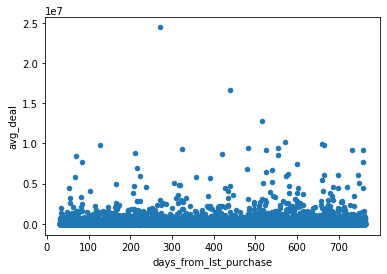

In [7]:
df.plot.scatter(y='avg_deal',x='days_from_lst_purchase')

We Clearly can see there are Outliers records in relation to the Average profi by deal, we will need to take out this ourliers before clusterinng



In [8]:
df=df.loc[df['Monetary']>0,:]
#remove 0 or negative monetary values

In [9]:
#removing monetary value outside of the 95% quentile
df=df.loc[df['Monetary']<df.Monetary.quantile(.95),:]

In [78]:
df=df.loc[df['avg_deal']<df.avg_deal.quantile(.99),:]

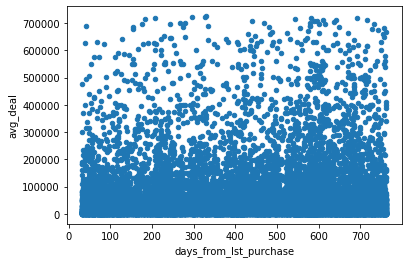

In [10]:
df.plot.scatter(y='avg_deal',x='days_from_lst_purchase')

as we can see on the axis, this attributes have very different magnitudes, therfore we need to normilize the dataset before clustering.

In [11]:
X_RFM_normalized = MinMaxScaler().fit(df[['Frequency','days_from_lst_purchase','avg_deal']]).transform(df[['Frequency','days_from_lst_purchase','avg_deal']])  

In [16]:
km=KMeans(n_clusters=4)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
y_predicted=km.fit_predict(X_RFM_normalized)
y_predicted

array([0, 0, 2, ..., 1, 0, 1])

In [18]:
df['Cluster']=y_predicted
df.head()

,Customer_ID,Recency,Frequency,Monetary,days_from_lst_purchase,avg_deal,Cluster
0,78dbd7cd230e9bfab9241303e0a40460876a4bc6181c63...,2021-03-12 00:00:00,1,36649.41240,74,36649.41240,0
1,d58a4f78ee59598a363afca764e3a862978e2e59df5a1a...,2021-04-22 00:00:00,1,8953.39220,33,8953.39220,0
2,6d3ce0a4e331bf54d74d97f21d4f2212cc662e6d8b4cfc...,2019-12-31 00:00:00,1,642.43000,511,642.43000,2
3,ae35c8740204c5747ee706f013b858c9bb1cfbb51dc603...,2020-01-05 00:00:00,2,23465.69000,506,11732.84500,2
4,0cba25990486464f2a3848e28f76b3f03b4f5869e267c5...,2020-04-16 00:00:00,1,308.76380,404,308.76380,2


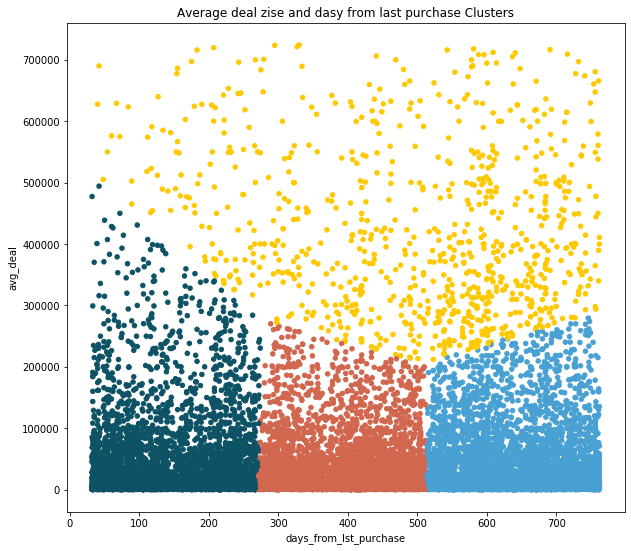

In [31]:



df.plot.scatter(y='avg_deal',x='days_from_lst_purchase',c='Cluster',colormap=HPE_Colors,title='Average deal zise and dasy from last purchase Clusters', figsize=(10,9),colorbar=False)
